In [ ]:
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read texts, split lines
gpttext = []
with open('/content/drive/MyDrive/copy_complete_eli5_chatgpt_responses_cleaned.txt', 'r') as f:
    for line in f:     
        for word in line.split():
            gpttext.append(word)

humantext = []
with open('/content/drive/MyDrive/copy2_complete_true_eli5_chatgpt_responses.txt', 'r') as f:
    for line in f:     
        for word in line.split():
            humantext.append(word)
  
print(gpttext[0:10])
print(humantext[0:10])

['Drugs', 'can', 'treat', 'different', 'symptoms', 'even', 'though', 'they', 'have', 'the']
['The', 'antihistamine', 'effect', 'is', 'the', 'desired', 'therapeutic', 'effect.', 'The', 'sleep']


In [ ]:
#calculate lexical diversity using NLTK intro code for both texts
def lexical_diversity(t):
    return len(set(t)) / len(t)

In [ ]:
ld = lexical_diversity(humantext)
ld2 = lexical_diversity(gpttext)
print(f'Human text: {ld:.5f}')
print(f'ChatGPT text: {ld2:.5f}')

Human text: 0.06484
ChatGPT text: 0.05786


The human-generated text has a marginally higher lexical diversity, 0.065 compared to 0.058.

Now, I will calculate the word entropy--the uncertainty-- of each text. This code is borrowed from https://medium.com/geekculture/how-to-calculate-the-entropy-of-an-entire-language-d17135b01282. The first is for the human text, second for ChatGPT text.

In [ ]:
from nltk import Counter
import math

def entropy(prob_dict):
    return sum([-v*math.log2(v) for _,v in prob_dict.items()])
  
freq = Counter(humantext)
total = len(humantext)

prob = {k:v/total for k,v in freq.items()}

entropy_per_word = entropy(prob)
print(entropy_per_word)

11.12278281858379


In [ ]:
freq1 = Counter(gpttext)
total1 = len(gpttext)

prob = {k:v/total for k,v in freq1.items()}

entropy_per_word = entropy(prob)
print(entropy_per_word)

4.799440080857951


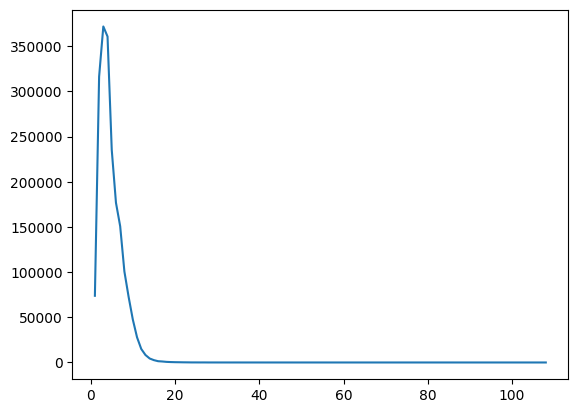

In [ ]:
#Investigating word lengths: graph frequency distribution for human lengths, then for both texts to compare
human_lengths = [len(w) for w in humantext]
length_fdisth = FreqDist(human_lengths)
fdsort = sorted(length_fdisth.items(), key=lambda i: i[0])
x1 = [a for (a,b) in fdsort]
y1 = [b for (a,b) in fdsort]

plt.plot(x1,y1)
plt.show()

In [ ]:
length_fdisth.most_common(15)

[(3, 371834),
 (4, 360700),
 (2, 316289),
 (5, 235259),
 (6, 176780),
 (7, 150798),
 (8, 100719),
 (1, 73803),
 (9, 72682),
 (10, 47537),
 (11, 27871),
 (12, 14966),
 (13, 8285),
 (14, 4409),
 (15, 2588),
 (16, 1417),
 (17, 1101),
 (18, 663),
 (19, 461),
 (20, 328),
 (21, 264),
 (22, 177),
 (23, 132),
 (24, 67),
 (25, 66),
 (27, 50),
 (26, 42),
 (29, 21),
 (28, 20),
 (30, 16),
 (35, 12),
 (32, 12),
 (34, 9),
 (31, 8),
 (33, 7),
 (39, 6),
 (38, 4),
 (40, 3),
 (36, 3),
 (45, 3)]

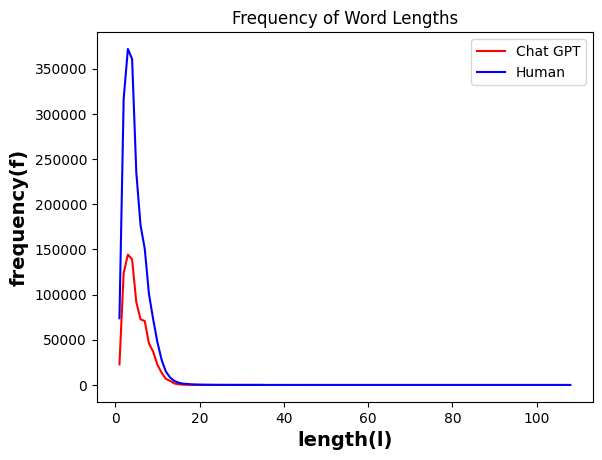

In [ ]:
human_lengths = [len(w) for w in humantext]
length_fdisth = FreqDist(human_lengths)
fdsort = sorted(length_fdisth.items(), key=lambda i: i[0])
x1 = [a for (a,b) in fdsort]
y1 = [b for (a,b) in fdsort]

gpt_lengths = [len(w) for w in gpttext]
length_fdistg = FreqDist(gpt_lengths)
fdsortg = sorted(length_fdistg.items(), key=lambda i: i[0])
x = [a for (a,b) in fdsortg]
y = [b for (a,b) in fdsortg]

plt.plot(x, y, color = "red", label = "Chat GPT")
plt.plot(x1,y1, color = "blue", label = "Human")
plt.title("Frequency of Word Lengths")
plt.ylabel("frequency(f)", fontsize=14, fontweight= "bold")
plt.xlabel("length(l)", fontsize=14, fontweight= "bold")
plt.legend()
plt.show()

In [ ]:
length_fdistg.most_common(40)

[(3, 144232),
 (4, 138914),
 (2, 123805),
 (5, 91631),
 (6, 72657),
 (7, 70690),
 (8, 45944),
 (9, 36767),
 (1, 22747),
 (10, 22362),
 (11, 13568),
 (12, 6734),
 (13, 4512),
 (14, 1610),
 (15, 731),
 (16, 331),
 (17, 172),
 (18, 87),
 (19, 44),
 (20, 21),
 (21, 19),
 (22, 7),
 (24, 5),
 (23, 4),
 (26, 4),
 (33, 2),
 (27, 2),
 (28, 2),
 (32, 1),
 (35, 1)]

The plots indicate that there are similar distributions of word length in both texts- frequency increases as word length increases until 3 and then decreases, flattening as word length increases into and past the high 10s. However, the human-generated text has substainally longer words than the Chat GPT text, though at a low frequency.

In [ ]:
#get and graph unigram distributions of both texts
fdisth = FreqDist(humantext)

In [ ]:
fdistg = FreqDist(gpttext)

In [ ]:
fdisth.most_common(20)

[('the', 95644),
 ('to', 56347),
 ('a', 50947),
 ('of', 46453),
 ('and', 43807),
 ('is', 34893),
 ('that', 27219),
 ('in', 26691),
 ('you', 23866),
 ('it', 19912),
 ('are', 17352),
 ('for', 14808),
 ('have', 12099),
 ('your', 12061),
 ('they', 11924),
 ('be', 11795),
 ('on', 11657),
 ('as', 11574),
 ('can', 10634),
 ('or', 10565)]

In [ ]:
fdistg.most_common(20)

[('the', 34319),
 ('and', 26910),
 ('to', 26736),
 ('a', 21073),
 ('of', 16968),
 ('is', 12971),
 ('in', 11315),
 ('that', 10606),
 ('can', 9511),
 ('it', 8851),
 ('or', 8765),
 ('are', 8461),
 ('because', 6686),
 ('they', 6309),
 ('for', 6214),
 ('be', 5451),
 ('on', 5267),
 ('have', 5266),
 ('you', 5205),
 ('as', 4749)]

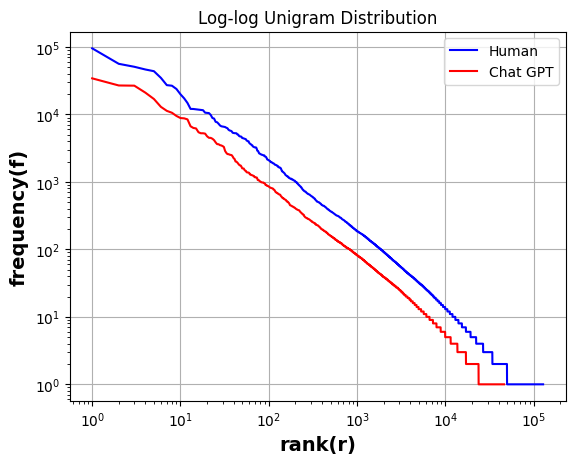

In [ ]:
commonh = fdisth.most_common()
fdplth = [(i+1, commonh[i][1]) for i in range(0, len(commonh))]

commong = fdistg.most_common()
fdpltg = [(i+1, commong[i][1]) for i in range(0, len(commong))]

ranksh = [r for (r,f) in fdplth]
freqsh = [f for (r,f) in fdplth]
ranksg = [r for (r,f) in fdpltg]
freqsg = [f for (r,f) in fdpltg]
plt.loglog(ranksh, freqsh, color = "blue", label = "Human")
plt.loglog(ranksg, freqsg, color = "red", label = "Chat GPT")
plt.title("Log-log Unigram Distribution")
plt.ylabel("frequency(f)", fontsize=14, fontweight= "bold")
plt.xlabel("rank(r)", fontsize=14, fontweight= "bold")
plt.legend()
plt.grid(True)
plt.show()

The texts have similar rank-frequency distributions and both follow Zipf's law, so I decided to lemmatize both texts. I also removed punctuation and stopwords since many of the most common words were stopwords.

In [ ]:
punct = [',', '.', '"', '\'', ';', ':', '[', ']', '(', ')', '--', '-', ',"', '!', '?', '?"', '|', '||']
stop = stopwords.words('english')
nonlex = stop + punct

In [ ]:
#lemmatize the unigrams!!
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
humantext_lower = [x.lower() for x in humantext]
lemmatized_human = [lemmatizer.lemmatize(w) for w in humantext_lower]
print(lemmatized_human[0:100])

['the', 'antihistamine', 'effect', 'is', 'the', 'desired', 'therapeutic', 'effect.', 'the', 'sleep', 'aid', 'effect', 'is', 'a', 'side', 'effect', 'of', 'the', 'drug,', 'namely', 'drowsiness.', 'you', 'are', 'taking', 'advantage', 'of', 'a', 'side', 'effect.', '>', 'how', 'do', 'we', 'know', 'all', 'form', 'of', 'life', 'require', 'the', 'same', 'nutrient', 'we', 'do?', 'we', "don't.", 'in', 'fact,', "it's", 'very', '*un*likely', 'that', '**all**', 'form', 'of', 'life', 'are', 'like', 'us.', 'the', 'problem', 'is', 'that,', 'while', 'we', 'know', 'that', 'life', 'can', 'evolve', 'in', 'environment', 'like', 'earth,', 'we', 'have', 'no', 'idea', 'what', 'condition', 'are', 'or', 'are', 'not', 'conducive', 'to', 'life', 'that', 'is', 'nothing', 'like', 'us.', 'that', 'is,', 'we', 'cannot', 'look', 'at', 'two', 'non-earth-like']


In [ ]:
#graph frequency distributions of lemmatized unigrams for both texts, graphing code for these from 
#https://dariuslfuller.medium.com/creating-visuals-with-nltks-freqdist-ac4e667e49f3
h = FreqDist(lemmatized_human)


In [ ]:
lemmatized_human = [a for a in lemmatized_human if (a.lower() not in nonlex)]
h2 = FreqDist(lemmatized_human)
h_plot = h2.most_common(15)

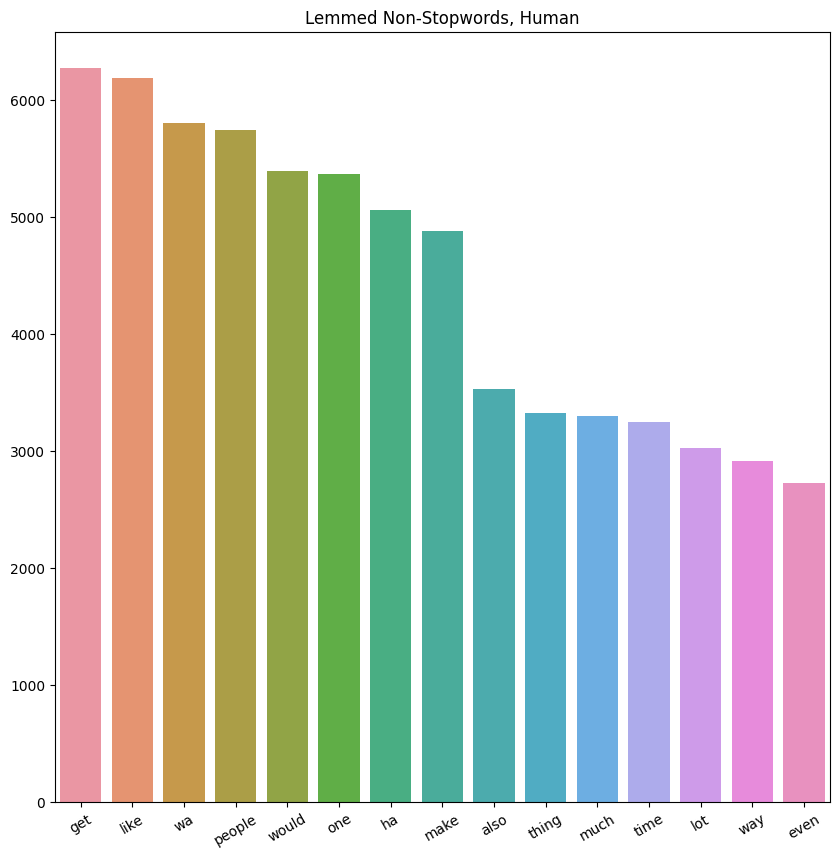

In [ ]:
## Conversion to Pandas series via Python Dictionary for easier plotting
h_plot = pd.Series(dict(h_plot))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=h_plot.index, y=h_plot.values, ax=ax).set(title='Lemmed Non-Stopwords, Human')
plt.xticks(rotation=30);

In [ ]:
gpttext_lower = [x.lower() for x in gpttext]
lemmatized_gpt = [lemmatizer.lemmatize(w) for w in gpttext_lower]
print(lemmatized_gpt[0:100])

In [ ]:
FreqDist(lemmatized_gpt).most_common(10)

In [ ]:
lemmatized_gpt = [a for a in lemmatized_gpt if (a.lower() not in nonlex)]
g2 = FreqDist(lemmatized_gpt)
g_plot = g2.most_common(15)

In [ ]:
## Conversion to Pandas series via Python Dictionary for easier plotting
g_plot = pd.Series(dict(g_plot))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=g_plot.index, y=g_plot.values, ax=ax).set(title='Lemmed Non-Stopwords, ChatGPT')
plt.title = "Lemmed Non-Stopwords, ChatGPT"
plt.xticks(rotation=30);

In [ ]:
import sys
import spacy

In [ ]:
#did not end up using spacy to lematize, but kept the code as an example
#nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Parse the sentence using the loaded 'en' model object `nlp`
#doc = nlp("/content/drive/MyDrive/copy2_complete_true_eli5_chatgpt_responses.txt")

#human_spacey = " ".join([w.lemma_ for w in doc])

In [ ]:
#print(human_spacey[0:10])

In [ ]:
#look at distributions of bigrams of stopwords

In [ ]:
#get bigrams for both texts
human_bigrams = [tuple(humantext[i:i+2]) for i in range(0,len(humantext)-1)]

In [ ]:
humanbigramfreq = FreqDist(human_bigrams)
humanbigramfreq.most_common(25)

In [ ]:
gpt_bigrams = [tuple(gpttext[i:i+2]) for i in range(0,len(gpttext)-1)]

In [ ]:
gptbigramfreq = FreqDist(gpt_bigrams)
gptbigramfreq.most_common(25)

In [ ]:
#get bigrams of stopwords and non-stopwords. Proceed with graphing bigrams for stopwords.
#graphing code again from https://dariuslfuller.medium.com/creating-visuals-with-nltks-freqdist-ac4e667e49f3
human_nonstop_bigrams = [(a,b) for (a,b) in human_bigrams 
                if (a.lower() not in nonlex) and (b.lower() not in nonlex)]
lex_bigramfreq = FreqDist(human_nonstop_bigrams)
lex_bigramfreq.most_common(25)

In [ ]:
human_stop_bigrams = [(a,b) for (a,b) in human_bigrams 
                if (a.lower() in stop) and (b.lower() in stop)]
stop_bigramfreq = FreqDist(human_stop_bigrams)
h_plot = stop_bigramfreq.most_common(10)

In [ ]:

wrds = ['-'.join(x) for x, c in h_plot]

wdth = [c for x, c in h_plot]

plt.title = 'Stopword bigrams, Human'
plt.barh(wrds, wdth, color='blue')

In [ ]:
gpt_nonstop_bigrams = [(a,b) for (a,b) in gpt_bigrams 
                if (a.lower() not in nonlex) and (b.lower() not in nonlex)]
lex_bigramfreq = FreqDist(gpt_nonstop_bigrams)
lex_bigramfreq.most_common(25)

In [ ]:
gpt_stop_bigrams = [(a,b) for (a,b) in gpt_bigrams 
                if (a.lower() in nonlex) and (b.lower() in nonlex)]
stop_bigramfreq = FreqDist(gpt_stop_bigrams)
g_plot = stop_bigramfreq.most_common(10)

In [ ]:
wrds = ['-'.join(x) for x, c in g_plot]

# get the counts
wdth = [c for x, c in g_plot]

plt.title = 'Stopword bigrams, Chat GPT'
plt.barh(wrds, wdth, color='red')

Looking at the bigrams with and without stopwords, many are the same despite text. The major differences we noticed were that for the bigrams including stopwords, there are many frequent ones including "because" in the GPT text, but none for the human text. Additionally, in the text without stopwords, the human text has a bigram with "I" in it, while the GPT text has a bigram with "us", both without stopwords had bigrams with "you". Human text might be more individualistic, while GPT-generated is more collectivist.

In [ ]:
#get trigrams for both texts and graph, use code from https://dariuslfuller.medium.com/creating-visuals-with-nltks-freqdist-ac4e667e49f3
human_trigrams = [tuple(humantext[i:i+3]) for i in range(0,len(humantext)-2)]

In [ ]:
humantrigramfreq = FreqDist(human_trigrams)
h_plot = humantrigramfreq.most_common(10)

<BarContainer object of 10 artists>

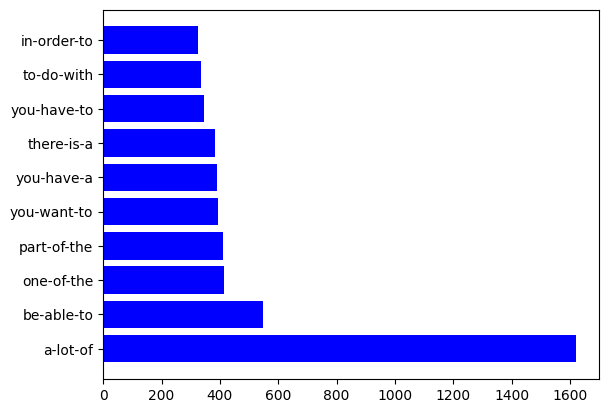

In [ ]:
wrds = ['-'.join(x) for x, c in h_plot]

# get the counts
wdth = [c for x, c in h_plot]

plt.title = 'Trigrams, Human'
plt.barh(wrds, wdth, color='blue')

In [ ]:
gpt_trigrams = [tuple(gpttext[i:i+3]) for i in range(0,len(gpttext)-2)]

In [ ]:
gpttrigramfreq = FreqDist(gpt_trigrams)
g_plot = gpttrigramfreq.most_common(10)

<BarContainer object of 10 artists>

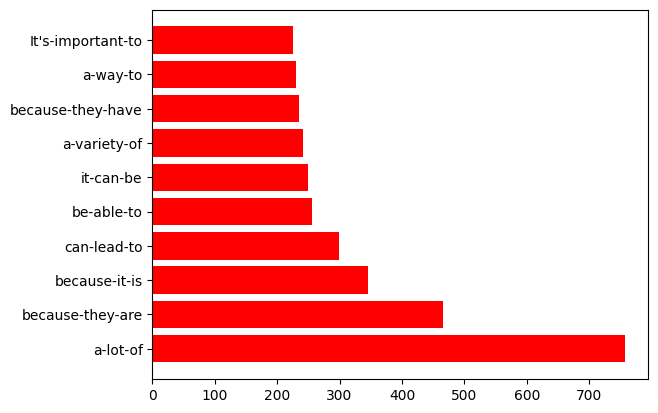

In [ ]:
wrds = ['-'.join(x) for x, c in g_plot]

# get the counts
wdth = [c for x, c in g_plot]

plt.title = 'Trigrams, ChatGPT'
plt.barh(wrds, wdth, color='red')

In [ ]:
human_nonstop_trigrams = [(a,b,c) for (a,b,c) in human_trigrams 
                if (a.lower() not in nonlex) and (b.lower() not in nonlex) and (c.lower() not in nonlex)]
lex_trigramfreq = FreqDist(human_nonstop_trigrams).most_common(10)

[(('comments_)', '1.', '[ELI5:'), 44),
 (('|', '|', '|'), 29),
 (("I'm", 'pretty', 'sure'), 22),
 (('explained:', '1.', '[ELI5:'), 20),
 (('|', '0', '|'), 20),
 (('H', 'H', 'H'), 20),
 (('would', 'look', 'like'), 18),
 (('5', 'year', 'old'), 17),
 (('white', 'blood', 'cells'), 17),
 (('0', '|', '0'), 17),
 (('|', '1', '|'), 16),
 (("what's", 'going', 'on.'), 15),
 (('pretty', 'much', 'every'), 14),
 (('something', 'like', 'this:'), 13),
 (('](_URL_0_)', '1.', '[ELI5:'), 13),
 (('0', '|', '1'), 13),
 (('Long', 'story', 'short,'), 12),
 (('1,', '2,', '3,'), 12),
 (('1', '|', '0'), 12),
 (('1', '|', '1'), 12),
 (('sympathetic', 'nervous', 'system'), 11),
 (('](_URL_4_)', '1.', '[ELI5:'), 10),
 (('body', 'gets', 'used'), 9),
 (('red', 'blood', 'cells'), 9),
 (('|', '||', '0'), 9)]

In [ ]:
#get and view stopword trigrams for both texts
human_stop_trigrams = [(a,b,c) for (a,b,c) in human_trigrams 
                if (a.lower() in stop) and (b.lower() in stop) and (c.lower() in stop)]
stoph3 = stop_trigramfreq = FreqDist(human_stop_trigrams).most_common(10)

In [ ]:
gpt_nonstop_trigrams = [(a,b,c) for (a,b,c) in gpt_trigrams 
                if (a.lower() not in nonlex) and (b.lower() not in nonlex) and (c.lower() not in nonlex)]
lexg_trigramfreq = FreqDist(gpt_nonstop_trigrams).most_common(10)
lexg_trigramfreq.most_common(25)

[(('make', 'us', 'feel'), 57),
 (('makes', 'us', 'feel'), 37),
 (('internet', 'service', 'providers'), 22),
 (('many', 'factors,', 'including'), 21),
 (('may', 'also', 'use'), 16),
 (('long', 'time', 'ago'), 15),
 (('make', 'sure', 'everyone'), 15),
 (('help', 'us', 'understand'), 15),
 (('make', 'sure', 'everything'), 15),
 (('might', 'feel', 'like'), 14),
 (('long', 'time', 'ago,'), 14),
 (('may', 'seem', 'like'), 14),
 (('helps', 'us', 'understand'), 13),
 (('World', 'War', 'II'), 12),
 (('world', 'around', 'us.'), 12),
 (('make', 'sure', "they're"), 12),
 (("body's", 'immune', 'system'), 12),
 (('would', 'require', 'significant'), 12),
 (('may', 'feel', 'like'), 12),
 (('health', 'problems', 'like'), 11),
 (('many', 'different', 'factors'), 11),
 (('AI', 'language', 'model,'), 11),
 (('help', 'us', 'feel'), 11),
 (('long', 'time', 'ago.'), 11),
 (('many', 'reasons,', 'including'), 11)]

In [ ]:
gpt_stop_trigrams = [(a,b,c) for (a,b,c) in gpt_trigrams 
                if (a.lower() in stop) and (b.lower() in stop) and (c.lower() in stop)]
stopg_trigramfreq = FreqDist(gpt_stop_trigrams)
stopg3 = stopg_trigramfreq.most_common(25)

NotImplementedError: ignored

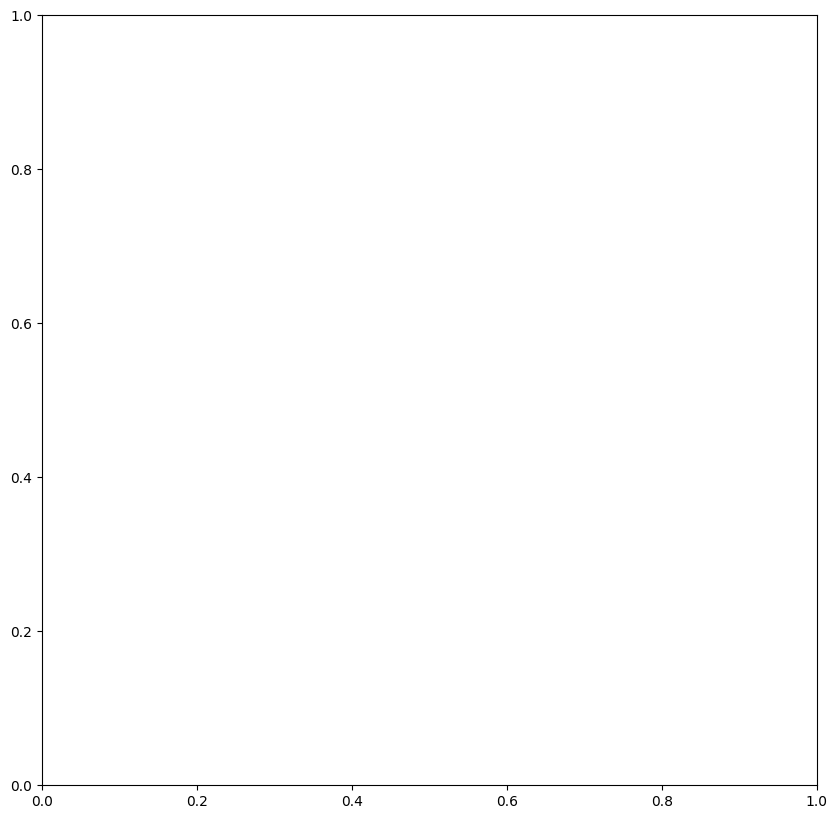

In [ ]:
#code that ended up not being used, please ignore
#import pandas as pd
#import seaborn as sns

## Conversion to Pandas series via Python Dictionary for easier plotting
#stopg3 = pd.Series(dict(stopg3))
#stoph3 = pd.Series(dict(stoph3))

## Setting figure, ax into variables
#fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
# h_plot = sns.barplot(x=stoph3.index, y=stoph3.values, ax=ax)
# g_plot = sns.barplot(x=stopg3.index, y=stopg3.values, ax=ax)
# plt.xticks(rotation=30);

Most of the trigrams for both texts involved stopwords, however, the trigrams for the GPT text were more explanatory (ie. "this means that"), which was similar to what we saw in the bigrams. When we removed stopwords, there were few frequent trigrams in our human text that were not a result of the nature of the dataset (numbering, name of the data, etc) while there were many in our generated data that were more typical. Again, we see that "us" only appears in the frequent GPT trigrams and "I" in the human, suggesting that this could be a way to distinguish the text.